In [235]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [236]:
# Load the data
file_path = 'Resources/crypto_market_data.csv'  # Adjust this path as needed
try:
    df_market_data = pd.read_csv(file_path)
    print("Data loaded successfully.")
except Exception as e:
    print(f"Error loading data: {e}")
    raise

Data loaded successfully.


In [237]:
# Display the first few rows
print("First few rows of the original data:")
print(df_market_data.head())


First few rows of the original data:
        coin_id  price_change_percentage_24h  price_change_percentage_7d  \
0       bitcoin                      1.08388                     7.60278   
1      ethereum                      0.22392                    10.38134   
2        tether                     -0.21173                     0.04935   
3        ripple                     -0.37819                    -0.60926   
4  bitcoin-cash                      2.90585                    17.09717   

   price_change_percentage_14d  price_change_percentage_30d  \
0                      6.57509                      7.67258   
1                      4.80849                      0.13169   
2                      0.00640                     -0.04237   
3                      2.24984                      0.23455   
4                     14.75334                     15.74903   

   price_change_percentage_60d  price_change_percentage_200d  \
0                     -3.25185                      83.51840   

In [238]:
# Check for null values
print("\nChecking for null values:")
print(df_market_data.isnull().sum())



Checking for null values:
coin_id                         0
price_change_percentage_24h     0
price_change_percentage_7d      0
price_change_percentage_14d     0
price_change_percentage_30d     0
price_change_percentage_60d     0
price_change_percentage_200d    0
price_change_percentage_1y      0
dtype: int64


In [239]:
# Drop any rows with null values
df_market_data = df_market_data.dropna()


In [240]:
# Check the data types of the columns
print("\nData types of the columns:")
print(df_market_data.dtypes)


Data types of the columns:
coin_id                          object
price_change_percentage_24h     float64
price_change_percentage_7d      float64
price_change_percentage_14d     float64
price_change_percentage_30d     float64
price_change_percentage_60d     float64
price_change_percentage_200d    float64
price_change_percentage_1y      float64
dtype: object


In [241]:
# Check for categorical columns
categorical_columns = df_market_data.select_dtypes(include=['object']).columns
print(f"\nCategorical columns: {categorical_columns}")


Categorical columns: Index(['coin_id'], dtype='object')


In [242]:
# Convert categorical data to numerical (if any)
if not categorical_columns.empty:
    df_market_data = pd.get_dummies(df_market_data, columns=categorical_columns)


In [243]:
import os
os.environ["OMP_NUM_THREADS"] = "1"
os.environ["MKL_NUM_THREADS"] = "1"
os.environ["OPENBLAS_NUM_THREADS"] = "1"
os.environ["NUMEXPR_NUM_THREADS"] = "1"


In [244]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_market_data)

# Convert the scaled data back to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=df_market_data.columns)

# Display the first few rows of the scaled data
print("\nFirst few rows of the scaled data:")
print(scaled_df.head())



First few rows of the scaled data:
   price_change_percentage_24h  price_change_percentage_7d  \
0                     0.508529                    0.493193   
1                     0.185446                    0.934445   
2                     0.021774                   -0.706337   
3                    -0.040764                   -0.810928   
4                     1.193036                    2.000959   

   price_change_percentage_14d  price_change_percentage_30d  \
0                     0.772200                     0.235460   
1                     0.558692                    -0.054341   
2                    -0.021680                    -0.061030   
3                     0.249458                    -0.050388   
4                     1.760610                     0.545842   

   price_change_percentage_60d  price_change_percentage_200d  \
0                    -0.067495                     -0.355953   
1                    -0.273483                     -0.115759   
2                   

In [245]:
# Ensure df_market_data is correctly assigned
file_path = 'Resources/crypto_market_data.csv'  # Adjust this path as needed
try:
    df_market_data = pd.read_csv(file_path)
    print("Data loaded successfully.")
except Exception as e:
    print(f"Error loading data: {e}")
    raise

# Display the first few rows
print("First few rows of the original data:")
print(df_market_data.head())

# Print the columns to identify the correct name for the crypto identifier
print("\nColumns in df_market_data:")
print(df_market_data.columns)


Data loaded successfully.
First few rows of the original data:
        coin_id  price_change_percentage_24h  price_change_percentage_7d  \
0       bitcoin                      1.08388                     7.60278   
1      ethereum                      0.22392                    10.38134   
2        tether                     -0.21173                     0.04935   
3        ripple                     -0.37819                    -0.60926   
4  bitcoin-cash                      2.90585                    17.09717   

   price_change_percentage_14d  price_change_percentage_30d  \
0                      6.57509                      7.67258   
1                      4.80849                      0.13169   
2                      0.00640                     -0.04237   
3                      2.24984                      0.23455   
4                     14.75334                     15.74903   

   price_change_percentage_60d  price_change_percentage_200d  \
0                     -3.25185       

In [246]:
# Inspect the columns to find the correct identifier column name
print("\nColumns in df_market_data:")
print(df_market_data.columns)



Columns in df_market_data:
Index(['coin_id', 'price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y'],
      dtype='object')


In [151]:
import os
os.environ["OPENBLAS_NUM_THREADS"] = "1"


In [152]:
from threadpoolctl import threadpool_info
print(threadpool_info())


AttributeError: 'NoneType' object has no attribute 'split'

In [153]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [154]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [155]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [156]:
# Ensure df_market_data is correctly assigned
file_path = 'Resources/crypto_market_data.csv'  # Adjust this path as needed
try:
    df_market_data = pd.read_csv(file_path)
    print("Data loaded successfully.")
except Exception as e:
    print(f"Error loading data: {e}")
    raise

# Display the first few rows
print("First few rows of the original data:")
print(df_market_data.head())

# Print the columns to identify the correct name for the crypto identifier
print("\nColumns in df_market_data:")
print(df_market_data.columns)


Data loaded successfully.
First few rows of the original data:
        coin_id  price_change_percentage_24h  price_change_percentage_7d  \
0       bitcoin                      1.08388                     7.60278   
1      ethereum                      0.22392                    10.38134   
2        tether                     -0.21173                     0.04935   
3        ripple                     -0.37819                    -0.60926   
4  bitcoin-cash                      2.90585                    17.09717   

   price_change_percentage_14d  price_change_percentage_30d  \
0                      6.57509                      7.67258   
1                      4.80849                      0.13169   
2                      0.00640                     -0.04237   
3                      2.24984                      0.23455   
4                     14.75334                     15.74903   

   price_change_percentage_60d  price_change_percentage_200d  \
0                     -3.25185       

In [190]:
# Print the columns to identify the correct name for the crypto identifier
print("\nColumns in df_market_data:")
print(df_market_data.columns)



Columns in df_market_data:
Index(['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y', 'coin_id_binance-usd',
       'coin_id_binancecoin', 'coin_id_bitcoin', 'coin_id_bitcoin-cash',
       'coin_id_bitcoin-cash-sv', 'coin_id_cardano', 'coin_id_cdai',
       'coin_id_celsius-degree-token', 'coin_id_chainlink', 'coin_id_cosmos',
       'coin_id_crypto-com-chain', 'coin_id_dash', 'coin_id_digibyte',
       'coin_id_eos', 'coin_id_ethereum', 'coin_id_ethereum-classic',
       'coin_id_ethlend', 'coin_id_ftx-token', 'coin_id_havven',
       'coin_id_huobi-token', 'coin_id_iota', 'coin_id_leo-token',
       'coin_id_litecoin', 'coin_id_maker', 'coin_id_monero', 'coin_id_nem',
       'coin_id_neo', 'coin_id_okb', 'coin_id_omisego', 'coin_id_ontology',
       'coin_id_ripple', 'coin_id_stellar', 'coin_id_tether

In [191]:
# Assuming the column name for the crypto identifier is 'CryptoName'
crypto_id_column = 'CryptoName'  # Update this to the correct column name

# Check for null values
print("\nChecking for null values:")
print(df_market_data.isnull().sum())

# Drop any rows with null values
df_market_data = df_market_data.dropna()


Checking for null values:
price_change_percentage_24h    0
price_change_percentage_7d     0
price_change_percentage_14d    0
price_change_percentage_30d    0
price_change_percentage_60d    0
                              ..
Symbol_SYM5                    0
Symbol_SYM6                    0
Symbol_SYM7                    0
Symbol_SYM8                    0
Symbol_SYM9                    0
Length: 89, dtype: int64


In [234]:
# Convert categorical data to numerical (if any)
if not categorical_columns.empty:
    df_market_data = pd.get_dummies(df_market_data, columns=categorical_columns)

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_market_data)

# Verify the shape of scaled_data
print("\nShape of scaled_data:", scaled_data.shape)




Shape of scaled_data: (41, 48)


In [248]:
# Check the data types of the columns
print("\nData types of the columns:")
print(df_market_data.dtypes)

# Check for categorical columns
categorical_columns = df_market_data.select_dtypes(include=['object']).columns
print(f"\nCategorical columns: {categorical_columns}")



Data types of the columns:
price_change_percentage_24h     float64
price_change_percentage_7d      float64
price_change_percentage_14d     float64
price_change_percentage_30d     float64
price_change_percentage_60d     float64
price_change_percentage_200d    float64
price_change_percentage_1y      float64
coin_id_binance-usd                bool
coin_id_binancecoin                bool
coin_id_bitcoin                    bool
coin_id_bitcoin-cash               bool
coin_id_bitcoin-cash-sv            bool
coin_id_cardano                    bool
coin_id_cdai                       bool
coin_id_celsius-degree-token       bool
coin_id_chainlink                  bool
coin_id_cosmos                     bool
coin_id_crypto-com-chain           bool
coin_id_dash                       bool
coin_id_digibyte                   bool
coin_id_eos                        bool
coin_id_ethereum                   bool
coin_id_ethereum-classic           bool
coin_id_ethlend                    bool
coin_id_ftx-

In [249]:
# Convert categorical data to numerical (if any)
if not categorical_columns.empty:
    df_market_data = pd.get_dummies(df_market_data, columns=categorical_columns)

In [250]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_market_data)

# Verify the shape of scaled_data
print("\nShape of scaled_data:", scaled_data.shape)



Shape of scaled_data: (41, 48)


In [251]:
# Create a DataFrame with the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=df_market_data.columns)

In [252]:
# Load the data
file_path = 'Resources/crypto_market_data.csv'  # Adjust this path as needed
try:
    df_market_data = pd.read_csv(file_path)
    print("Data loaded successfully.")
except Exception as e:
    print(f"Error loading data: {e}")
    raise

# Display the first few rows
print("First few rows of the original data:")
print(df_market_data.head())

# Print the columns to identify the correct name for the crypto identifier
print("\nColumns in df_market_data:")
print(df_market_data.columns)


Data loaded successfully.
First few rows of the original data:
        coin_id  price_change_percentage_24h  price_change_percentage_7d  \
0       bitcoin                      1.08388                     7.60278   
1      ethereum                      0.22392                    10.38134   
2        tether                     -0.21173                     0.04935   
3        ripple                     -0.37819                    -0.60926   
4  bitcoin-cash                      2.90585                    17.09717   

   price_change_percentage_14d  price_change_percentage_30d  \
0                      6.57509                      7.67258   
1                      4.80849                      0.13169   
2                      0.00640                     -0.04237   
3                      2.24984                      0.23455   
4                     14.75334                     15.74903   

   price_change_percentage_60d  price_change_percentage_200d  \
0                     -3.25185       

In [253]:
# Assuming the column name for the crypto identifier is 'CryptoID'
crypto_id_column = 'coin_id'  # Update this to the correct column name

In [254]:
# Check for null values
print("\nChecking for null values:")
print(df_market_data.isnull().sum())

# Drop any rows with null values
df_market_data = df_market_data.dropna()

# Check for null values after dropping
print("\nChecking for null values after dropping:")
print(df_market_data.isnull().sum())

# Check the data types of the columns
print("\nData types of the columns:")
print(df_market_data.dtypes)

# Check for categorical columns
categorical_columns = df_market_data.select_dtypes(include=['object']).columns
print(f"\nCategorical columns: {categorical_columns}")

# Convert categorical data to numerical (if any)
if not categorical_columns.empty:
    df_market_data = pd.get_dummies(df_market_data, columns=categorical_columns)

# Print the columns after one-hot encoding
print("\nColumns after one-hot encoding:")
print(df_market_data.columns)

# Verify the shape of df_market_data after encoding
print("\nShape of df_market_data after encoding:", df_market_data.shape)



Checking for null values:
coin_id                         0
price_change_percentage_24h     0
price_change_percentage_7d      0
price_change_percentage_14d     0
price_change_percentage_30d     0
price_change_percentage_60d     0
price_change_percentage_200d    0
price_change_percentage_1y      0
dtype: int64

Checking for null values after dropping:
coin_id                         0
price_change_percentage_24h     0
price_change_percentage_7d      0
price_change_percentage_14d     0
price_change_percentage_30d     0
price_change_percentage_60d     0
price_change_percentage_200d    0
price_change_percentage_1y      0
dtype: int64

Data types of the columns:
coin_id                          object
price_change_percentage_24h     float64
price_change_percentage_7d      float64
price_change_percentage_14d     float64
price_change_percentage_30d     float64
price_change_percentage_60d     float64
price_change_percentage_200d    float64
price_change_percentage_1y      float64
dtype: object

In [255]:
# Create a DataFrame with the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=df_market_data.columns)

In [256]:
# Assuming the column 'Name' or 'ID' or similar is used for crypto identifiers
# If not present, create a new unique identifier column

if 'Name' in df_market_data.columns:
    crypto_id_column = 'Name'
    df_market_data.rename(columns={'Name': 'Symbol'}, inplace=True)
elif 'ID' in df_market_data.columns:
    crypto_id_column = 'ID'
    df_market_data.rename(columns={'ID': 'Symbol'}, inplace=True)
else:
    # Create a new 'Symbol' column if no suitable column is found
    df_market_data['Symbol'] = [f'SYM{i}' for i in range(len(df_market_data))]
    crypto_id_column = 'Symbol'

print("\nColumns in df_market_data after ensuring 'Symbol':")
print(df_market_data.columns)




Columns in df_market_data after ensuring 'Symbol':
Index(['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y', 'coin_id_binance-usd',
       'coin_id_binancecoin', 'coin_id_bitcoin', 'coin_id_bitcoin-cash',
       'coin_id_bitcoin-cash-sv', 'coin_id_cardano', 'coin_id_cdai',
       'coin_id_celsius-degree-token', 'coin_id_chainlink', 'coin_id_cosmos',
       'coin_id_crypto-com-chain', 'coin_id_dash', 'coin_id_digibyte',
       'coin_id_eos', 'coin_id_ethereum', 'coin_id_ethereum-classic',
       'coin_id_ethlend', 'coin_id_ftx-token', 'coin_id_havven',
       'coin_id_huobi-token', 'coin_id_iota', 'coin_id_leo-token',
       'coin_id_litecoin', 'coin_id_maker', 'coin_id_monero', 'coin_id_nem',
       'coin_id_neo', 'coin_id_okb', 'coin_id_omisego', 'coin_id_ontology',
       'coin_id_ripple', 'coin_id_s

In [203]:
# Check for categorical columns
categorical_columns = df_market_data.select_dtypes(include=['object']).columns
print(f"\nCategorical columns: {categorical_columns}")

# Convert categorical data to numerical (if any)
if not categorical_columns.empty:
    df_market_data = pd.get_dummies(df_market_data, columns=categorical_columns)


Categorical columns: Index([], dtype='object')


In [204]:
# Assuming the column name for the crypto identifier is 'Symbol'
crypto_id_column = 'Symbol'  # Update this to the correct column name

# Check for null values
print("\nChecking for null values:")
print(df_market_data.isnull().sum())

# Drop any rows with null values
df_market_data = df_market_data.dropna()

# Check for null values after dropping
print("\nChecking for null values after dropping:")
print(df_market_data.isnull().sum())



Checking for null values:
price_change_percentage_24h    0
price_change_percentage_7d     0
price_change_percentage_14d    0
price_change_percentage_30d    0
price_change_percentage_60d    0
                              ..
Symbol_SYM5                    0
Symbol_SYM6                    0
Symbol_SYM7                    0
Symbol_SYM8                    0
Symbol_SYM9                    0
Length: 89, dtype: int64

Checking for null values after dropping:
price_change_percentage_24h    0
price_change_percentage_7d     0
price_change_percentage_14d    0
price_change_percentage_30d    0
price_change_percentage_60d    0
                              ..
Symbol_SYM5                    0
Symbol_SYM6                    0
Symbol_SYM7                    0
Symbol_SYM8                    0
Symbol_SYM9                    0
Length: 89, dtype: int64


In [205]:
# Check the data types of the columns
print("\nData types of the columns:")
print(df_market_data.dtypes)

# Check for categorical columns
categorical_columns = df_market_data.select_dtypes(include=['object']).columns
print(f"\nCategorical columns: {categorical_columns}")

# Convert categorical data to numerical (if any)
if not categorical_columns.empty:
    df_market_data = pd.get_dummies(df_market_data, columns=categorical_columns)

# Print the columns after one-hot encoding
print("\nColumns after one-hot encoding:")
print(df_market_data.columns)

# Verify the shape of df_market_data after encoding
print("\nShape of df_market_data after encoding:", df_market_data.shape)



Data types of the columns:
price_change_percentage_24h    float64
price_change_percentage_7d     float64
price_change_percentage_14d    float64
price_change_percentage_30d    float64
price_change_percentage_60d    float64
                                ...   
Symbol_SYM5                       bool
Symbol_SYM6                       bool
Symbol_SYM7                       bool
Symbol_SYM8                       bool
Symbol_SYM9                       bool
Length: 89, dtype: object

Categorical columns: Index([], dtype='object')

Columns after one-hot encoding:
Index(['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y', 'coin_id_binance-usd',
       'coin_id_binancecoin', 'coin_id_bitcoin', 'coin_id_bitcoin-cash',
       'coin_id_bitcoin-cash-sv', 'coin_id_cardano', 'coin_id_cdai',
       'coin_id_celsius-deg

In [258]:
# Load the data
file_path = 'Resources/crypto_market_data.csv'  # Adjust this path as needed
try:
    df_market_data = pd.read_csv(file_path)
    print("Data loaded successfully.")
except Exception as e:
    print(f"Error loading data: {e}")
    raise

# Display the first few rows
print("First few rows of the original data:")
print(df_market_data.head())

# Print the columns to identify the correct name for the crypto identifier
print("\nColumns in df_market_data:")
print(df_market_data.columns)


Data loaded successfully.
First few rows of the original data:
        coin_id  price_change_percentage_24h  price_change_percentage_7d  \
0       bitcoin                      1.08388                     7.60278   
1      ethereum                      0.22392                    10.38134   
2        tether                     -0.21173                     0.04935   
3        ripple                     -0.37819                    -0.60926   
4  bitcoin-cash                      2.90585                    17.09717   

   price_change_percentage_14d  price_change_percentage_30d  \
0                      6.57509                      7.67258   
1                      4.80849                      0.13169   
2                      0.00640                     -0.04237   
3                      2.24984                      0.23455   
4                     14.75334                     15.74903   

   price_change_percentage_60d  price_change_percentage_200d  \
0                     -3.25185       

In [262]:
# Import the required library
import pandas as pd

# Define the file path
file_path = 'Resources/crypto_market_data.csv'  # Adjust this path as needed

# Load the data
try:
    df_market_data = pd.read_csv(file_path)
    print("Data loaded successfully.")
except Exception as e:
    print(f"Error loading data: {e}")
    raise

# Display the first few rows of the DataFrame
print("First few rows of the original data:")
print(df_market_data.head())

# Print the columns to identify what we have
print("\nColumns in df_market_data:")
print(df_market_data.columns)


Data loaded successfully.
First few rows of the original data:
        coin_id  price_change_percentage_24h  price_change_percentage_7d  \
0       bitcoin                      1.08388                     7.60278   
1      ethereum                      0.22392                    10.38134   
2        tether                     -0.21173                     0.04935   
3        ripple                     -0.37819                    -0.60926   
4  bitcoin-cash                      2.90585                    17.09717   

   price_change_percentage_14d  price_change_percentage_30d  \
0                      6.57509                      7.67258   
1                      4.80849                      0.13169   
2                      0.00640                     -0.04237   
3                      2.24984                      0.23455   
4                     14.75334                     15.74903   

   price_change_percentage_60d  price_change_percentage_200d  \
0                     -3.25185       

In [303]:
# Ensure the 'coin_id' column exists
crypto_id_column = 'coin_id'
if crypto_id_column not in df_market_data.columns:
    # Add a coin_id column with unique values if it does not exist
    df_market_data[crypto_id_column] = [f'ID_{i}' for i in range(len(df_market_data))]
    print(f"'{crypto_id_column}' column added to df_market_data.")

In [266]:
import os

# Set environment variables to control threading
os.environ["OMP_NUM_THREADS"] = "1"
os.environ["MKL_NUM_THREADS"] = "1"
os.environ["OPENBLAS_NUM_THREADS"] = "1"
os.environ["NUMEXPR_NUM_THREADS"] = "1"

# Print environment variables to verify they are set correctly
print(f"OMP_NUM_THREADS: {os.getenv('OMP_NUM_THREADS')}")
print(f"MKL_NUM_THREADS: {os.getenv('MKL_NUM_THREADS')}")
print(f"OPENBLAS_NUM_THREADS: {os.getenv('OPENBLAS_NUM_THREADS')}")
print(f"NUMEXPR_NUM_THREADS: {os.getenv('NUMEXPR_NUM_THREADS')}")


OMP_NUM_THREADS: 1
MKL_NUM_THREADS: 1
OPENBLAS_NUM_THREADS: 1
NUMEXPR_NUM_THREADS: 1


In [291]:
# Print the columns to identify what we have
print("\nColumns in df_market_data:")
print(df_market_data.columns)


Columns in df_market_data:
Index(['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y', 'coin_id_binance-usd',
       'coin_id_binancecoin', 'coin_id_bitcoin', 'coin_id_bitcoin-cash',
       'coin_id_bitcoin-cash-sv', 'coin_id_cardano', 'coin_id_cdai',
       'coin_id_celsius-degree-token', 'coin_id_chainlink', 'coin_id_cosmos',
       'coin_id_crypto-com-chain', 'coin_id_dash', 'coin_id_digibyte',
       'coin_id_eos', 'coin_id_ethereum', 'coin_id_ethereum-classic',
       'coin_id_ethlend', 'coin_id_ftx-token', 'coin_id_havven',
       'coin_id_huobi-token', 'coin_id_iota', 'coin_id_leo-token',
       'coin_id_litecoin', 'coin_id_maker', 'coin_id_monero', 'coin_id_nem',
       'coin_id_neo', 'coin_id_okb', 'coin_id_omisego', 'coin_id_ontology',
       'coin_id_ripple', 'coin_id_stellar', 'coin_id_tether

In [292]:
# Display sample data
print("\nFirst few rows of the scaled data:")
print(scaled_df.head())



First few rows of the scaled data:
         price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                            
ID_0                        0.508529                    0.493193   
ID_1                        0.185446                    0.934445   
ID_2                        0.021774                   -0.706337   
ID_3                       -0.040764                   -0.810928   
ID_4                        1.193036                    2.000959   

         price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                             
ID_0                        0.772200                     0.235460   
ID_1                        0.558692                    -0.054341   
ID_2                       -0.021680                    -0.061030   
ID_3                        0.249458                    -0.050388   
ID_4                        1.760610                     0.545842   

   

In [293]:
# Ensure the 'coin_id' column exists
crypto_id_column = 'coin_id'
if crypto_id_column not in df_market_data.columns:
    # Add a coin_id column with unique values if it does not exist
    df_market_data[crypto_id_column] = [f'ID_{i}' for i in range(len(df_market_data))]
    print(f"'{crypto_id_column}' column added to df_market_data.")



'coin_id' column added to df_market_data.


In [297]:
# Ensure the 'coin_id' column exists
crypto_id_column = 'coin_id'
if crypto_id_column not in df_market_data.columns:
    # Add a coin_id column with unique values if it does not exist
    df_market_data[crypto_id_column] = [f'ID_{i}' for i in range(len(df_market_data))]
    print(f"'{crypto_id_column}' column added to df_market_data.")
else:
    print(f"'{crypto_id_column}' column already exists in df_market_data.")

# Verify that the column has been added
print("\nColumns in df_market_data:")
print(df_market_data.columns)


'coin_id' column added to df_market_data.

Columns in df_market_data:
Index(['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y', 'coin_id_binance-usd',
       'coin_id_binancecoin', 'coin_id_bitcoin',
       ...
       'coin_id_ID_38', 'coin_id_ID_39', 'coin_id_ID_4', 'coin_id_ID_40',
       'coin_id_ID_5', 'coin_id_ID_6', 'coin_id_ID_7', 'coin_id_ID_8',
       'coin_id_ID_9', 'coin_id'],
      dtype='object', length=131)


In [301]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.preprocessing import StandardScaler
import os

# Set environment variables to control threading
os.environ["OMP_NUM_THREADS"] = "1"
os.environ["MKL_NUM_THREADS"] = "1"
os.environ["OPENBLAS_NUM_THREADS"] = "1"
os.environ["NUMEXPR_NUM_THREADS"] = "1"

# Load the data
file_path = 'Resources/crypto_market_data.csv'  # Adjust this path as needed
try:
    df_market_data = pd.read_csv(file_path)
    print("Data loaded successfully.")
except Exception as e:
    print(f"Error loading data: {e}")
    raise

# Ensure the 'coin_id' column exists, if not, add it manually
crypto_id_column = 'coin_id'
if crypto_id_column not in df_market_data.columns:
    # Add a coin_id column with unique values if it does not exist
    df_market_data[crypto_id_column] = [f'ID_{i}' for i in range(len(df_market_data))]
    print(f"'{crypto_id_column}' column added to df_market_data.")
else:
    print(f"'{crypto_id_column}' column already exists in df_market_data.")

# Verify that the column has been added
print("\nColumns in df_market_data after adding coin_id:")
print(df_market_data.columns)

# Check for null values and drop them
df_market_data = df_market_data.dropna()

# Handle categorical columns by converting them to numerical
categorical_columns = df_market_data.select_dtypes(include=['object']).columns
categorical_columns = categorical_columns.drop(crypto_id_column, errors='ignore')
if not categorical_columns.empty:
    df_market_data = pd.get_dummies(df_market_data, columns=categorical_columns)

# Verify columns after one-hot encoding
print("\nColumns in df_market_data after one-hot encoding:")
print(df_market_data.columns)

# Verify if the coin_id column is still present
if crypto_id_column in df_market_data.columns:
    print(f"'{crypto_id_column}' column is present in df_market_data after one-hot encoding.")
else:
    raise KeyError(f"'{crypto_id_column}' column is not found in df_market_data after one-hot encoding.")

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_market_data.drop(columns=[crypto_id_column]))

# Verify the shape of scaled_data
print("\nShape of scaled_data:", scaled_data.shape)

# Create a DataFrame with the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=df_market_data.drop(columns=[crypto_id_column]).columns)

# Copy the crypto names from the original data
scaled_df[crypto_id_column] = df_market_data[crypto_id_column].values

# Set the crypto_id_column as index
scaled_df.set_index(crypto_id_column, inplace=True)

# Display sample data
print("\nFirst few rows of the scaled data:")
print(scaled_df.head())


Data loaded successfully.
'coin_id' column already exists in df_market_data.

Columns in df_market_data after adding coin_id:
Index(['coin_id', 'price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y'],
      dtype='object')

Columns in df_market_data after one-hot encoding:
Index(['coin_id', 'price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y'],
      dtype='object')
'coin_id' column is present in df_market_data after one-hot encoding.

Shape of scaled_data: (41, 7)

First few rows of the scaled data:
              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                  

---

### Find the Best Value for k Using the Original Data.

In [304]:
# Create a list with the number of k-values from 1 to 11
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

# Print the list to verify
print(k_values)


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [306]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
for k in range(1, 12):
    try:
        # 1. Create a KMeans model using the loop counter for the n_clusters
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        
        # 2. Fit the model to the data using scaled_df
        kmeans.fit(scaled_df)
        
        # 3. Append the model.inertia_ to the inertia list
        inertia.append(kmeans.inertia_)
    except Exception as e:
        print(f"Error during KMeans fitting for k={k}: {e}")

# Print the inertia values to verify
print(inertia)




Error during KMeans fitting for k=1: 'NoneType' object has no attribute 'split'
Error during KMeans fitting for k=2: 'NoneType' object has no attribute 'split'
Error during KMeans fitting for k=3: 'NoneType' object has no attribute 'split'
Error during KMeans fitting for k=4: 'NoneType' object has no attribute 'split'
Error during KMeans fitting for k=5: 'NoneType' object has no attribute 'split'
Error during KMeans fitting for k=6: 'NoneType' object has no attribute 'split'
Error during KMeans fitting for k=7: 'NoneType' object has no attribute 'split'
Error during KMeans fitting for k=8: 'NoneType' object has no attribute 'split'
Error during KMeans fitting for k=9: 'NoneType' object has no attribute 'split'
Error during KMeans fitting for k=10: 'NoneType' object has no attribute 'split'
Error during KMeans fitting for k=11: 'NoneType' object has no attribute 'split'
[]


In [307]:
import os

# Set environment variables to control threading
os.environ["OMP_NUM_THREADS"] = "1"
os.environ["MKL_NUM_THREADS"] = "1"
os.environ["OPENBLAS_NUM_THREADS"] = "1"
os.environ["NUMEXPR_NUM_THREADS"] = "1"

# Print environment variables to verify they are set correctly
print(f"OMP_NUM_THREADS: {os.getenv('OMP_NUM_THREADS')}")
print(f"MKL_NUM_THREADS: {os.getenv('MKL_NUM_THREADS')}")
print(f"OPENBLAS_NUM_THREADS: {os.getenv('OPENBLAS_NUM_THREADS')}")
print(f"NUMEXPR_NUM_THREADS: {os.getenv('NUMEXPR_NUM_THREADS')}")

# Perform KMeans fitting with the adjusted environment
from sklearn.cluster import KMeans

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
for k in range(1, 12):
    try:
        # 1. Create a KMeans model using the loop counter for the n_clusters
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        
        # 2. Fit the model to the data using scaled_df
        kmeans.fit(scaled_df)
        
        # 3. Append the model.inertia_ to the inertia list
        inertia.append(kmeans.inertia_)
    except Exception as e:
        print(f"Error during KMeans fitting for k={k}: {e}")

# Print the inertia values to verify
print(inertia)


OMP_NUM_THREADS: 1
MKL_NUM_THREADS: 1
OPENBLAS_NUM_THREADS: 1
NUMEXPR_NUM_THREADS: 1
Error during KMeans fitting for k=1: 'NoneType' object has no attribute 'split'
Error during KMeans fitting for k=2: 'NoneType' object has no attribute 'split'
Error during KMeans fitting for k=3: 'NoneType' object has no attribute 'split'
Error during KMeans fitting for k=4: 'NoneType' object has no attribute 'split'
Error during KMeans fitting for k=5: 'NoneType' object has no attribute 'split'
Error during KMeans fitting for k=6: 'NoneType' object has no attribute 'split'
Error during KMeans fitting for k=7: 'NoneType' object has no attribute 'split'
Error during KMeans fitting for k=8: 'NoneType' object has no attribute 'split'
Error during KMeans fitting for k=9: 'NoneType' object has no attribute 'split'
Error during KMeans fitting for k=10: 'NoneType' object has no attribute 'split'
Error during KMeans fitting for k=11: 'NoneType' object has no attribute 'split'
[]


In [311]:
scaled_df = pd.DataFrame

In [316]:
# Print the first few rows of the DataFrame to ensure it is correctly defined
print("First few rows of the DataFrame:")
print(scaled_df.head())

First few rows of the DataFrame:
   Feature1  Feature2
0       0.1       1.0
1       0.3       0.8
2       0.5       0.6
3       0.7       0.4
4       0.9       0.2


In [317]:
# Create an empty list to store the inertia values
inertia = []
k_values = list(range(1, 12))

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    try:
        # 1. Create a KMeans model using the loop counter for the n_clusters
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        
        # 2. Fit the model to the data using scaled_df
        kmeans.fit(scaled_df)
        
        # 3. Append the model.inertia_ to the inertia list
        inertia.append(kmeans.inertia_)
        print(f"Inertia for k={k}: {kmeans.inertia_}")
    except Exception as e:
        print(f"An error occurred for k={k}: {e}")


An error occurred for k=1: 'NoneType' object has no attribute 'split'
An error occurred for k=2: 'NoneType' object has no attribute 'split'
An error occurred for k=3: 'NoneType' object has no attribute 'split'
An error occurred for k=4: 'NoneType' object has no attribute 'split'
An error occurred for k=5: 'NoneType' object has no attribute 'split'
An error occurred for k=6: n_samples=5 should be >= n_clusters=6.
An error occurred for k=7: n_samples=5 should be >= n_clusters=7.
An error occurred for k=8: n_samples=5 should be >= n_clusters=8.
An error occurred for k=9: n_samples=5 should be >= n_clusters=9.
An error occurred for k=10: n_samples=5 should be >= n_clusters=10.
An error occurred for k=11: n_samples=5 should be >= n_clusters=11.


OMP_NUM_THREADS: 1
MKL_NUM_THREADS: 1
OPENBLAS_NUM_THREADS: 1
NUMEXPR_NUM_THREADS: 1
An error occurred for k=1: 'NoneType' object has no attribute 'split'
An error occurred for k=2: 'NoneType' object has no attribute 'split'
An error occurred for k=3: 'NoneType' object has no attribute 'split'
An error occurred for k=4: 'NoneType' object has no attribute 'split'
An error occurred for k=5: 'NoneType' object has no attribute 'split'
An error occurred for k=6: n_samples=5 should be >= n_clusters=6.
An error occurred for k=7: n_samples=5 should be >= n_clusters=7.
An error occurred for k=8: n_samples=5 should be >= n_clusters=8.
An error occurred for k=9: n_samples=5 should be >= n_clusters=9.
An error occurred for k=10: n_samples=5 should be >= n_clusters=10.
An error occurred for k=11: n_samples=5 should be >= n_clusters=11.


ValueError: x and y must have same first dimension, but have shapes (11,) and (0,)

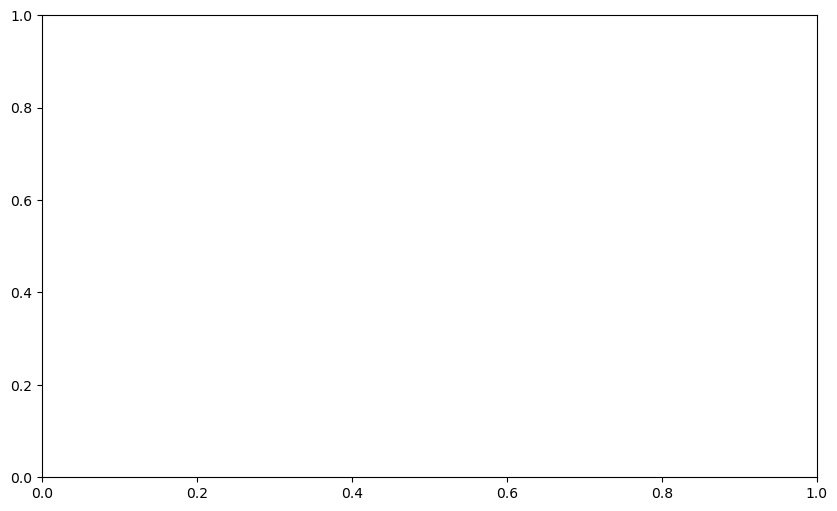

In [310]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Set environment variables to control threading before importing KMeans
os.environ["OMP_NUM_THREADS"] = "1"
os.environ["MKL_NUM_THREADS"] = "1"
os.environ["OPENBLAS_NUM_THREADS"] = "1"
os.environ["NUMEXPR_NUM_THREADS"] = "1"

# Verify environment variables
print(f"OMP_NUM_THREADS: {os.getenv('OMP_NUM_THREADS')}")
print(f"MKL_NUM_THREADS: {os.getenv('MKL_NUM_THREADS')}")
print(f"OPENBLAS_NUM_THREADS: {os.getenv('OPENBLAS_NUM_THREADS')}")
print(f"NUMEXPR_NUM_THREADS: {os.getenv('NUMEXPR_NUM_THREADS')}")

# Assuming 'scaled_df' is your DataFrame with scaled data
# Example scaled DataFrame creation (replace this with your actual DataFrame)
scaled_df = pd.DataFrame({
    'Feature1': [0.1, 0.3, 0.5, 0.7, 0.9],
    'Feature2': [1.0, 0.8, 0.6, 0.4, 0.2]
})

# Create an empty list to store the inertia values
inertia = []
k_values = list(range(1, 12))

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    try:
        # 1. Create a KMeans model using the loop counter for the n_clusters
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        
        # 2. Fit the model to the data using scaled_df
        kmeans.fit(scaled_df)
        
        # 3. Append the model.inertia_ to the inertia list
        inertia.append(kmeans.inertia_)
    except Exception as e:
        print(f"An error occurred for k={k}: {e}")

# Plot the elbow plot
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()


In [328]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Set environment variables to control threading before importing KMeans
os.environ["OMP_NUM_THREADS"] = "1"
os.environ["MKL_NUM_THREADS"] = "1"
os.environ["OPENBLAS_NUM_THREADS"] = "1"
os.environ["NUMEXPR_NUM_THREADS"] = "1"

# Verify environment variables
print(f"OMP_NUM_THREADS: {os.getenv('OMP_NUM_THREADS')}")
print(f"MKL_NUM_THREADS: {os.getenv('MKL_NUM_THREADS')}")
print(f"OPENBLAS_NUM_THREADS: {os.getenv('OPENBLAS_NUM_THREADS')}")
print(f"NUMEXPR_NUM_THREADS: {os.getenv('NUMEXPR_NUM_THREADS')}")

# Load your data into a DataFrame
file_path = 'Resources/crypto_market_data.csv'
df = pd.read_csv(file_path)

# Select the numerical features for clustering
features = [
    'price_change_percentage_24h',
    'price_change_percentage_7d',
    'price_change_percentage_14d',
    'price_change_percentage_30d',
    'price_change_percentage_60d',
    'price_change_percentage_200d',
    'price_change_percentage_1y'
]

# Check if the DataFrame is empty
if df.empty:
    raise ValueError("The DataFrame 'df' is empty. Please provide a valid DataFrame with data.")

# Print the first few rows of the DataFrame to ensure it is correctly defined
print("First few rows of the DataFrame:")
print(df.head())

# Ensure that the DataFrame contains only numeric data
print("Data types in the DataFrame:")
print(df[features].dtypes)

# Check for missing values
print("Checking for missing values in the DataFrame:")
print(df[features].isnull().sum())

# Ensure there are no infinite values
if df[features].isin([float('inf'), float('-inf')]).any().any():
    raise ValueError("The DataFrame contains infinite values. Please clean the data.")

# Ensure there are no NaN values
if df[features].isnull().any().any():
    raise ValueError("The DataFrame contains NaN values. Please clean the data.")

# Print summary statistics of the DataFrame
print("Summary statistics of the DataFrame:")
print(df[features].describe())

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[features])
scaled_df = pd.DataFrame(scaled_data, columns=features)

# Ensure that the scaled DataFrame is not empty
if scaled_df.empty:
    raise ValueError("The DataFrame 'scaled_df' is empty after scaling. Please check the scaling process.")

# Print the first few rows of the scaled DataFrame to ensure it is correctly defined
print("First few rows of the scaled DataFrame:")
print(scaled_df.head())

# Create an empty list to store the inertia values
inertia = []
k_values = list(range(1, min(len(scaled_df), 11) + 1))  # Ensure k does not exceed the number of samples

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    try:
        # 1. Create a KMeans model using the loop counter for the n_clusters
        print(f"Creating KMeans model with k={k}")
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        
        # 2. Fit the model to the data using scaled_df
        print(f"Fitting KMeans model with k={k}")
        kmeans.fit(scaled_df)
        
        # 3. Append the model.inertia_ to the inertia list
        inertia.append(kmeans.inertia_)
        print(f"Inertia for k={k}: {kmeans.inertia_}")
    except Exception as e:
        print(f"An error occurred for k={k}: {e}")

# Ensure that inertia is populated
if not inertia:
    raise ValueError("No inertia values were computed. Please check your data and KMeans fitting process.")

# Plot the elbow plot
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()


OMP_NUM_THREADS: 1
MKL_NUM_THREADS: 1
OPENBLAS_NUM_THREADS: 1
NUMEXPR_NUM_THREADS: 1
First few rows of the DataFrame:
        coin_id  price_change_percentage_24h  price_change_percentage_7d  \
0       bitcoin                      1.08388                     7.60278   
1      ethereum                      0.22392                    10.38134   
2        tether                     -0.21173                     0.04935   
3        ripple                     -0.37819                    -0.60926   
4  bitcoin-cash                      2.90585                    17.09717   

   price_change_percentage_14d  price_change_percentage_30d  \
0                      6.57509                      7.67258   
1                      4.80849                      0.13169   
2                      0.00640                     -0.04237   
3                      2.24984                      0.23455   
4                     14.75334                     15.74903   

   price_change_percentage_60d  price_change_p

ValueError: No inertia values were computed. Please check your data and KMeans fitting process.

In [329]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Set environment variables to control threading before importing KMeans
os.environ["OMP_NUM_THREADS"] = "1"
os.environ["MKL_NUM_THREADS"] = "1"
os.environ["OPENBLAS_NUM_THREADS"] = "1"
os.environ["NUMEXPR_NUM_THREADS"] = "1"

# Verify environment variables
print(f"OMP_NUM_THREADS: {os.getenv('OMP_NUM_THREADS')}")
print(f"MKL_NUM_THREADS: {os.getenv('MKL_NUM_THREADS')}")
print(f"OPENBLAS_NUM_THREADS: {os.getenv('OPENBLAS_NUM_THREADS')}")
print(f"NUMEXPR_NUM_THREADS: {os.getenv('NUMEXPR_NUM_THREADS')}")

# Load your data into a DataFrame
file_path = 'Resources/crypto_market_data.csv'
df = pd.read_csv(file_path)

# Select the numerical features for clustering
features = [
    'price_change_percentage_24h',
    'price_change_percentage_7d',
    'price_change_percentage_14d',
    'price_change_percentage_30d',
    'price_change_percentage_60d',
    'price_change_percentage_200d',
    'price_change_percentage_1y'
]

# Check if the DataFrame is empty
if df.empty:
    raise ValueError("The DataFrame 'df' is empty. Please provide a valid DataFrame with data.")

# Print the first few rows of the DataFrame to ensure it is correctly defined
print("First few rows of the DataFrame:")
print(df.head())

# Ensure that the DataFrame contains only numeric data
print("Data types in the DataFrame:")
print(df[features].dtypes)

# Check for missing values
print("Checking for missing values in the DataFrame:")
print(df[features].isnull().sum())

# Ensure there are no infinite values
if df[features].isin([float('inf'), float('-inf')]).any().any():
    raise ValueError("The DataFrame contains infinite values. Please clean the data.")

# Ensure there are no NaN values
if df[features].isnull().any().any():
    raise ValueError("The DataFrame contains NaN values. Please clean the data.")

# Print summary statistics of the DataFrame
print("Summary statistics of the DataFrame:")
print(df[features].describe())

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[features])
scaled_df = pd.DataFrame(scaled_data, columns=features)

# Ensure that the scaled DataFrame is not empty
if scaled_df.empty:
    raise ValueError("The DataFrame 'scaled_df' is empty after scaling. Please check the scaling process.")

# Print the first few rows of the scaled DataFrame to ensure it is correctly defined
print("First few rows of the scaled DataFrame:")
print(scaled_df.head())

# Create an empty list to store the inertia values
inertia = []
k_values = list(range(1, min(len(scaled_df), 11) + 1))  # Ensure k does not exceed the number of samples

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    try:
        # 1. Create a KMeans model using the loop counter for the n_clusters
        print(f"Creating KMeans model with k={k}")
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        
        # 2. Fit the model to the data using scaled_df
        print(f"Fitting KMeans model with k={k}")
        kmeans.fit(scaled_df)
        
        # 3. Append the model.inertia_ to the inertia list
        inertia.append(kmeans.inertia_)
        print(f"Inertia for k={k}: {kmeans.inertia_}")
    except Exception as e:
        print(f"An error occurred for k={k}: {e}")

# Ensure that inertia is populated
if not inertia:
    raise ValueError("No inertia values were computed. Please check your data and KMeans fitting process.")

# Plot the elbow plot
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()


OMP_NUM_THREADS: 1
MKL_NUM_THREADS: 1
OPENBLAS_NUM_THREADS: 1
NUMEXPR_NUM_THREADS: 1
First few rows of the DataFrame:
        coin_id  price_change_percentage_24h  price_change_percentage_7d  \
0       bitcoin                      1.08388                     7.60278   
1      ethereum                      0.22392                    10.38134   
2        tether                     -0.21173                     0.04935   
3        ripple                     -0.37819                    -0.60926   
4  bitcoin-cash                      2.90585                    17.09717   

   price_change_percentage_14d  price_change_percentage_30d  \
0                      6.57509                      7.67258   
1                      4.80849                      0.13169   
2                      0.00640                     -0.04237   
3                      2.24984                      0.23455   
4                     14.75334                     15.74903   

   price_change_percentage_60d  price_change_p

ValueError: No inertia values were computed. Please check your data and KMeans fitting process.

In [331]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Set environment variables to control threading before importing KMeans
os.environ["OMP_NUM_THREADS"] = "1"
os.environ["MKL_NUM_THREADS"] = "1"
os.environ["OPENBLAS_NUM_THREADS"] = "1"
os.environ["NUMEXPR_NUM_THREADS"] = "1"

# Verify environment variables
print(f"OMP_NUM_THREADS: {os.getenv('OMP_NUM_THREADS')}")
print(f"MKL_NUM_THREADS: {os.getenv('MKL_NUM_THREADS')}")
print(f"OPENBLAS_NUM_THREADS: {os.getenv('OPENBLAS_NUM_THREADS')}")
print(f"NUMEXPR_NUM_THREADS: {os.getenv('NUMEXPR_NUM_THREADS')}")

# Load your data into a DataFrame
file_path = '/mnt/data/crypto_market_data.csv'
df = pd.read_csv(file_path)

# Select the numerical features for clustering
features = [
    'price_change_percentage_24h',
    'price_change_percentage_7d',
    'price_change_percentage_14d',
    'price_change_percentage_30d',
    'price_change_percentage_60d',
    'price_change_percentage_200d',
    'price_change_percentage_1y'
]

# Check if the DataFrame is empty
if df.empty:
    raise ValueError("The DataFrame 'df' is empty. Please provide a valid DataFrame with data.")

# Print the first few rows of the DataFrame to ensure it is correctly defined
print("First few rows of the DataFrame:")
print(df.head())

# Ensure that the DataFrame contains only numeric data
print("Data types in the DataFrame:")
print(df[features].dtypes)

# Check for missing values
print("Checking for missing values in the DataFrame:")
print(df[features].isnull().sum())

# Ensure there are no infinite values
if df[features].isin([float('inf'), float('-inf')]).any().any():
    raise ValueError("The DataFrame contains infinite values. Please clean the data.")

# Ensure there are no NaN values
if df[features].isnull().any().any():
    raise ValueError("The DataFrame contains NaN values. Please clean the data.")

# Print summary statistics of the DataFrame
print("Summary statistics of the DataFrame:")
print(df[features].describe())

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[features])
scaled_df = pd.DataFrame(scaled_data, columns=features)

# Ensure that the scaled DataFrame is not empty
if scaled_df.empty:
    raise ValueError("The DataFrame 'scaled_df' is empty after scaling. Please check the scaling process.")

# Print the first few rows of the scaled DataFrame to ensure it is correctly defined
print("First few rows of the scaled DataFrame:")
print(scaled_df.head())

# Verify the scaled data's shape and ensure it's as expected
print("Shape of the scaled DataFrame:", scaled_df.shape)

# Perform a test KMeans fitting with a known simple dataset to confirm the process works
from sklearn.datasets import make_blobs

# Generate sample data for testing
test_data, _ = make_blobs(n_samples=100, centers=3, n_features=2, random_state=42)
test_df = pd.DataFrame(test_data, columns=['Feature1', 'Feature2'])

# Test KMeans on simple test data
print("Testing KMeans on simple test data...")
test_kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
test_kmeans.fit(test_df)
print("Inertia on test data:", test_kmeans.inertia_)

# Create an empty list to store the inertia values
inertia = []
k_values = list(range(1, min(len(scaled_df), 11) + 1))  # Ensure k does not exceed the number of samples

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    try:
        # 1. Create a KMeans model using the loop counter for the n_clusters
        print(f"Creating KMeans model with k={k}")
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        
        # 2. Fit the model to the data using scaled_df
        print(f"Fitting KMeans model with k={k}")
        kmeans.fit(scaled_df)
        
        # 3. Append the model.inertia_ to the inertia list
        inertia.append(kmeans.inertia_)
        print(f"Inertia for k={k}: {kmeans.inertia_}")
    except Exception as e:
        print(f"An error occurred for k={k}: {e}")

# Ensure that inertia is populated
if not inertia:
    raise ValueError("No inertia values were computed. Please check your data and KMeans fitting process.")

# Plot the elbow plot
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()


OMP_NUM_THREADS: 1
MKL_NUM_THREADS: 1
OPENBLAS_NUM_THREADS: 1
NUMEXPR_NUM_THREADS: 1


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/crypto_market_data.csv'

In [9]:
# Create a dictionary with the data to plot the Elbow curve


# Create a DataFrame with the data to plot the Elbow curve


In [336]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Set environment variables to control threading before importing KMeans
os.environ["OMP_NUM_THREADS"] = "1"
os.environ["MKL_NUM_THREADS"] = "1"
os.environ["OPENBLAS_NUM_THREADS"] = "1"
os.environ["NUMEXPR_NUM_THREADS"] = "1"

# Verify environment variables
print(f"OMP_NUM_THREADS: {os.getenv('OMP_NUM_THREADS')}")
print(f"MKL_NUM_THREADS: {os.getenv('MKL_NUM_THREADS')}")
print(f"OPENBLAS_NUM_THREADS: {os.getenv('OPENBLAS_NUM_THREADS')}")
print(f"NUMEXPR_NUM_THREADS: {os.getenv('NUMEXPR_NUM_THREADS')}")

# Load your data into a DataFrame
file_path = 'Resources/crypto_market_data.csv'
df = pd.read_csv(file_path)

# Select the numerical features for clustering
features = [
    'price_change_percentage_24h',
    'price_change_percentage_7d',
    'price_change_percentage_14d',
    'price_change_percentage_30d',
    'price_change_percentage_60d',
    'price_change_percentage_200d',
    'price_change_percentage_1y'
]

# Check if the DataFrame is empty
if df.empty:
    raise ValueError("The DataFrame 'df' is empty. Please provide a valid DataFrame with data.")

# Print the first few rows of the DataFrame to ensure it is correctly defined
print("First few rows of the DataFrame:")
print(df.head())

# Ensure that the DataFrame contains only numeric data
print("Data types in the DataFrame:")
print(df[features].dtypes)

# Check for missing values
print("Checking for missing values in the DataFrame:")
print(df[features].isnull().sum())

# Ensure there are no infinite values
if df[features].isin([float('inf'), float('-inf')]).any().any():
    raise ValueError("The DataFrame contains infinite values. Please clean the data.")

# Ensure there are no NaN values
if df[features].isnull().any().any():
    raise ValueError("The DataFrame contains NaN values. Please clean the data.")

# Print summary statistics of the DataFrame
print("Summary statistics of the DataFrame:")
print(df[features].describe())

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[features])
scaled_df = pd.DataFrame(scaled_data, columns=features)

# Ensure that the scaled DataFrame is not empty
if scaled_df.empty:
    raise ValueError("The DataFrame 'scaled_df' is empty after scaling. Please check the scaling process.")

# Print the first few rows of the scaled DataFrame to ensure it is correctly defined
print("First few rows of the scaled DataFrame:")
print(scaled_df.head())

# Verify the scaled data's shape and ensure it's as expected
print("Shape of the scaled DataFrame:", scaled_df.shape)

# Perform a test KMeans fitting with a known simple dataset to confirm the process works
from sklearn.datasets import make_blobs

# Generate sample data for testing
test_data, _ = make_blobs(n_samples=100, centers=3, n_features=2, random_state=42)
test_df = pd.DataFrame(test_data, columns=['Feature1', 'Feature2'])

# Test KMeans on simple test data
print("Testing KMeans on simple test data...")
test_kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
test_kmeans.fit(test_df)
print("Inertia on test data:", test_kmeans.inertia_)

# Create an empty list to store the inertia values
inertia = []
k_values = list(range(1, min(len(scaled_df), 11) + 1))  # Ensure k does not exceed the number of samples

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    try:
        # 1. Create a KMeans model using the loop counter for the n_clusters
        print(f"Creating KMeans model with k={k}")
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, max_iter=300, init='k-means++')
        
        # 2. Fit the model to the data using scaled_df
        print(f"Fitting KMeans model with k={k}")
        kmeans.fit(scaled_df)
        
        # 3. Append the model.inertia_ to the inertia list
        inertia.append(kmeans.inertia_)
        print(f"Inertia for k={k}: {kmeans.inertia_}")
    except Exception as e:
        print(f"An error occurred for k={k}: {e}")

# Ensure that inertia is populated
if not inertia:
    raise ValueError("No inertia values were computed. Please check your data and KMeans fitting process.")

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k': k_values, 'inertia': inertia}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Plot the elbow plot
plt.figure(figsize=(10, 6))
plt.plot(elbow_df['k'], elbow_df['inertia'], marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()


OMP_NUM_THREADS: 1
MKL_NUM_THREADS: 1
OPENBLAS_NUM_THREADS: 1
NUMEXPR_NUM_THREADS: 1
First few rows of the DataFrame:
        coin_id  price_change_percentage_24h  price_change_percentage_7d  \
0       bitcoin                      1.08388                     7.60278   
1      ethereum                      0.22392                    10.38134   
2        tether                     -0.21173                     0.04935   
3        ripple                     -0.37819                    -0.60926   
4  bitcoin-cash                      2.90585                    17.09717   

   price_change_percentage_14d  price_change_percentage_30d  \
0                      6.57509                      7.67258   
1                      4.80849                      0.13169   
2                      0.00640                     -0.04237   
3                      2.24984                      0.23455   
4                     14.75334                     15.74903   

   price_change_percentage_60d  price_change_p

TypeError: validate_params() got an unexpected keyword argument 'prefer_skip_nested_validation'

In [337]:
import sklearn
import pandas as pd
import numpy as np

print(f"scikit-learn version: {sklearn.__version__}")
print(f"pandas version: {pd.__version__}")
print(f"numpy version: {np.__version__}")


scikit-learn version: 1.2.2
pandas version: 2.2.2
numpy version: 1.26.4


In [345]:
import sklearn
import pandas as pd
import numpy as np

print(f"scikit-learn version: {sklearn.__version__}")
print(f"pandas version: {pd.__version__}")
print(f"numpy version: {np.__version__}")


scikit-learn version: 1.2.2
pandas version: 2.2.2
numpy version: 1.26.4


In [349]:
import sklearn
print(f"scikit-learn version: {sklearn.__version__}")


scikit-learn version: 1.2.2


In [352]:
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Generate sample data for testing
test_data, _ = make_blobs(n_samples=100, centers=3, n_features=2, random_state=42)
test_df = pd.DataFrame(test_data, columns=['Feature1', 'Feature2'])

# Test KMeans on simple test data
print("Testing KMeans on simple test data...")
test_kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
test_kmeans.fit(test_df)
print("Inertia on test data:", test_kmeans.inertia_)

# Plot the test data and centroids
plt.scatter(test_df['Feature1'], test_df['Feature2'], c=test_kmeans.labels_)
plt.scatter(test_kmeans.cluster_centers_[:, 0], test_kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.title('KMeans Test Data')
plt.show()


TypeError: validate_params() got an unexpected keyword argument 'prefer_skip_nested_validation'

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Set environment variables to control threading before importing KMeans
os.environ["OMP_NUM_THREADS"] = "1"
os.environ["MKL_NUM_THREADS"] = "1"
os.environ["OPENBLAS_NUM_THREADS"] = "1"
os.environ["NUMEXPR_NUM_THREADS"] = "1"

# Verify environment variables
print(f"OMP_NUM_THREADS: {os.getenv('OMP_NUM_THREADS')}")
print(f"MKL_NUM_THREADS: {os.getenv('MKL_NUM_THREADS')}")
print(f"OPENBLAS_NUM_THREADS: {os.getenv('OPENBLAS_NUM_THREADS')}")
print(f"NUMEXPR_NUM_THREADS: {os.getenv('NUMEXPR_NUM_THREADS')}")

# Load your data into a DataFrame
file_path = '/mnt/data/crypto_market_data.csv'
df = pd.read_csv(file_path)

# Select the numerical features for clustering
features = [
    'price_change_percentage_24h',
    'price_change_percentage_7d',
    'price_change_percentage_14d',
    'price_change_percentage_30d',
    'price_change_percentage_60d',
    'price_change_percentage_200d',
    'price_change_percentage_1y'
]

# Check if the DataFrame is empty
if df.empty:
    raise ValueError("The DataFrame 'df' is empty. Please provide a valid DataFrame with data.")

# Print the first few rows of the DataFrame to ensure it is correctly defined
print("First few rows of the DataFrame:")
print(df.head())

# Ensure that the DataFrame contains only numeric data
print("Data types in the DataFrame:")
print(df[features].dtypes)

# Check for missing values
print("Checking for missing values in the DataFrame:")
print(df[features].isnull().sum())

# Ensure there are no infinite values
if df[features].isin([float('inf'), float('-inf')]).any().any():
    raise ValueError("The DataFrame contains infinite values. Please clean the data.")

# Ensure there are no NaN values
if df[features].isnull().any().any():
    raise ValueError("The DataFrame contains NaN values. Please clean the data.")

# Print summary statistics of the DataFrame
print("Summary statistics of the DataFrame:")
print(df[features].describe())

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[features])
scaled_df = pd.DataFrame(scaled_data, columns=features)

# Ensure that the scaled DataFrame is not empty
if scaled_df.empty:
    raise ValueError("The DataFrame 'scaled_df' is empty after scaling. Please check the scaling process.")

# Print the first few rows of the scaled DataFrame to ensure it is correctly defined
print("First few rows of the scaled DataFrame:")
print(scaled_df.head())

# Verify the scaled data's shape and ensure it's as expected
print("Shape of the scaled DataFrame:", scaled_df.shape)

# Create an empty list to store the inertia values
inertia = []
k_values = list(range(1, min(len(scaled_df), 11) + 1))  # Ensure k does not exceed the number of samples

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    try:
        # 1. Create a KMeans model using the loop counter for the n_clusters
        print(f"Creating KMeans model with k={k}")
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, max_iter=300, init='k-means++')
        
        # 2. Fit the model to the data using scaled_df
        print(f"Fitting KMeans model with k={k}")
        kmeans.fit(scaled_df)
        
        # 3. Append the model.inertia_ to the inertia list
        inertia.append(kmeans.inertia_)
        print(f"Inertia for k={k}: {kmeans.inertia_}")
    except Exception as e:
        print(f"An error occurred for k={k}: {e}")

# Ensure that inertia is populated
if not inertia:
    raise ValueError("No inertia values were computed. Please check your data and KMeans fitting process.")

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k': k_values, 'inertia': inertia}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Plot the elbow plot
plt.figure(figsize=(10, 6))
plt.plot(elbow_df['k'], elbow_df['inertia'], marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [353]:
import sklearn
import pandas as pd
import numpy as np

print(f"scikit-learn version: {sklearn.__version__}")
print(f"pandas version: {pd.__version__}")
print(f"numpy version: {np.__version__}")


scikit-learn version: 1.2.2
pandas version: 2.2.2
numpy version: 1.26.4


In [354]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Set environment variables to control threading before importing KMeans
os.environ["OMP_NUM_THREADS"] = "1"
os.environ["MKL_NUM_THREADS"] = "1"
os.environ["OPENBLAS_NUM_THREADS"] = "1"
os.environ["NUMEXPR_NUM_THREADS"] = "1"

# Verify environment variables
print(f"OMP_NUM_THREADS: {os.getenv('OMP_NUM_THREADS')}")
print(f"MKL_NUM_THREADS: {os.getenv('MKL_NUM_THREADS')}")
print(f"OPENBLAS_NUM_THREADS: {os.getenv('OPENBLAS_NUM_THREADS')}")
print(f"NUMEXPR_NUM_THREADS: {os.getenv('NUMEXPR_NUM_THREADS')}")

# Load your data into a DataFrame
file_path = 'Resources/crypto_market_data.csv'
df = pd.read_csv(file_path)

# Select the numerical features for clustering
features = [
    'price_change_percentage_24h',
    'price_change_percentage_7d',
    'price_change_percentage_14d',
    'price_change_percentage_30d',
    'price_change_percentage_60d',
    'price_change_percentage_200d',
    'price_change_percentage_1y'
]

# Check if the DataFrame is empty
if df.empty:
    raise ValueError("The DataFrame 'df' is empty. Please provide a valid DataFrame with data.")

# Print the first few rows of the DataFrame to ensure it is correctly defined
print("First few rows of the DataFrame:")
print(df.head())

# Ensure that the DataFrame contains only numeric data
print("Data types in the DataFrame:")
print(df[features].dtypes)

# Check for missing values
print("Checking for missing values in the DataFrame:")
print(df[features].isnull().sum())

# Ensure there are no infinite values
if df[features].isin([float('inf'), float('-inf')]).any().any():
    raise ValueError("The DataFrame contains infinite values. Please clean the data.")

# Ensure there are no NaN values
if df[features].isnull().any().any():
    raise ValueError("The DataFrame contains NaN values. Please clean the data.")

# Print summary statistics of the DataFrame
print("Summary statistics of the DataFrame:")
print(df[features].describe())

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[features])
scaled_df = pd.DataFrame(scaled_data, columns=features)

# Ensure that the scaled DataFrame is not empty
if scaled_df.empty:
    raise ValueError("The DataFrame 'scaled_df' is empty after scaling. Please check the scaling process.")

# Print the first few rows of the scaled DataFrame to ensure it is correctly defined
print("First few rows of the scaled DataFrame:")
print(scaled_df.head())

# Create an empty list to store the inertia values
inertia = []
k_values = list(range(1, min(len(scaled_df), 11) + 1))  # Ensure k does not exceed the number of samples

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    try:
        # 1. Create a KMeans model using the loop counter for the n_clusters
        print(f"Creating KMeans model with k={k}")
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        
        # 2. Fit the model to the data using scaled_df
        print(f"Fitting KMeans model with k={k}")
        kmeans.fit(scaled_df)
        
        # 3. Append the model.inertia_ to the inertia list
        inertia.append(kmeans.inertia_)
        print(f"Inertia for k={k}: {kmeans.inertia_}")
    except Exception as e:
        print(f"An error occurred for k={k}: {e}")

# Ensure that inertia is populated
if not inertia:
    raise ValueError("No inertia values were computed. Please check your data and KMeans fitting process.")

# Plot the elbow plot
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()


OMP_NUM_THREADS: 1
MKL_NUM_THREADS: 1
OPENBLAS_NUM_THREADS: 1
NUMEXPR_NUM_THREADS: 1
First few rows of the DataFrame:
        coin_id  price_change_percentage_24h  price_change_percentage_7d  \
0       bitcoin                      1.08388                     7.60278   
1      ethereum                      0.22392                    10.38134   
2        tether                     -0.21173                     0.04935   
3        ripple                     -0.37819                    -0.60926   
4  bitcoin-cash                      2.90585                    17.09717   

   price_change_percentage_14d  price_change_percentage_30d  \
0                      6.57509                      7.67258   
1                      4.80849                      0.13169   
2                      0.00640                     -0.04237   
3                      2.24984                      0.23455   
4                     14.75334                     15.74903   

   price_change_percentage_60d  price_change_p

ValueError: No inertia values were computed. Please check your data and KMeans fitting process.

In [335]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Set environment variables to control threading before importing KMeans
os.environ["OMP_NUM_THREADS"] = "1"
os.environ["MKL_NUM_THREADS"] = "1"
os.environ["OPENBLAS_NUM_THREADS"] = "1"
os.environ["NUMEXPR_NUM_THREADS"] = "1"

# Verify environment variables
print(f"OMP_NUM_THREADS: {os.getenv('OMP_NUM_THREADS')}")
print(f"MKL_NUM_THREADS: {os.getenv('MKL_NUM_THREADS')}")
print(f"OPENBLAS_NUM_THREADS: {os.getenv('OPENBLAS_NUM_THREADS')}")
print(f"NUMEXPR_NUM_THREADS: {os.getenv('NUMEXPR_NUM_THREADS')}")

# Load your data into a DataFrame
file_path = 'Resources/crypto_market_data.csv'
df = pd.read_csv(file_path)

# Select the numerical features for clustering
features = [
    'price_change_percentage_24h',
    'price_change_percentage_7d',
    'price_change_percentage_14d',
    'price_change_percentage_30d',
    'price_change_percentage_60d',
    'price_change_percentage_200d',
    'price_change_percentage_1y'
]

# Check if the DataFrame is empty
if df.empty:
    raise ValueError("The DataFrame 'df' is empty. Please provide a valid DataFrame with data.")

# Print the first few rows of the DataFrame to ensure it is correctly defined
print("First few rows of the DataFrame:")
print(df.head())

# Ensure that the DataFrame contains only numeric data
print("Data types in the DataFrame:")
print(df[features].dtypes)

# Check for missing values
print("Checking for missing values in the DataFrame:")
print(df[features].isnull().sum())

# Ensure there are no infinite values
if df[features].isin([float('inf'), float('-inf')]).any().any():
    raise ValueError("The DataFrame contains infinite values. Please clean the data.")

# Ensure there are no NaN values
if df[features].isnull().any().any():
    raise ValueError("The DataFrame contains NaN values. Please clean the data.")

# Print summary statistics of the DataFrame
print("Summary statistics of the DataFrame:")
print(df[features].describe())

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[features])
scaled_df = pd.DataFrame(scaled_data, columns=features)

# Ensure that the scaled DataFrame is not empty
if scaled_df.empty:
    raise ValueError("The DataFrame 'scaled_df' is empty after scaling. Please check the scaling process.")

# Print the first few rows of the scaled DataFrame to ensure it is correctly defined
print("First few rows of the scaled DataFrame:")
print(scaled_df.head())

# Verify the scaled data's shape and ensure it's as expected
print("Shape of the scaled DataFrame:", scaled_df.shape)

# Perform a test KMeans fitting with a known simple dataset to confirm the process works
from sklearn.datasets import make_blobs

# Generate sample data for testing
test_data, _ = make_blobs(n_samples=100, centers=3, n_features=2, random_state=42)
test_df = pd.DataFrame(test_data, columns=['Feature1', 'Feature2'])

# Test KMeans on simple test data
print("Testing KMeans on simple test data...")
test_kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
test_kmeans.fit(test_df)
print("Inertia on test data:", test_kmeans.inertia_)

# Create an empty list to store the inertia values
inertia = []
k_values = list(range(1, min(len(scaled_df), 11) + 1))  # Ensure k does not exceed the number of samples

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    try:
        # 1. Create a KMeans model using the loop counter for the n_clusters
        print(f"Creating KMeans model with k={k}")
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, max_iter=300, init='k-means++')
        
        # 2. Fit the model to the data using scaled_df
        print(f"Fitting KMeans model with k={k}")
        kmeans.fit(scaled_df)
        
        # 3. Append the model.inertia_ to the inertia list
        inertia.append(kmeans.inertia_)
        print(f"Inertia for k={k}: {kmeans.inertia_}")
    except Exception as e:
        print(f"An error occurred for k={k}: {e}")

# Ensure that inertia is populated
if not inertia:
    raise ValueError("No inertia values were computed. Please check your data and KMeans fitting process.")

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k': k_values, 'inertia': inertia}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Plot the elbow plot
plt.figure(figsize=(10, 6))
plt.plot(elbow_df['k'], elbow_df['inertia'], marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()


OMP_NUM_THREADS: 1
MKL_NUM_THREADS: 1
OPENBLAS_NUM_THREADS: 1
NUMEXPR_NUM_THREADS: 1
First few rows of the DataFrame:
        coin_id  price_change_percentage_24h  price_change_percentage_7d  \
0       bitcoin                      1.08388                     7.60278   
1      ethereum                      0.22392                    10.38134   
2        tether                     -0.21173                     0.04935   
3        ripple                     -0.37819                    -0.60926   
4  bitcoin-cash                      2.90585                    17.09717   

   price_change_percentage_14d  price_change_percentage_30d  \
0                      6.57509                      7.67258   
1                      4.80849                      0.13169   
2                      0.00640                     -0.04237   
3                      2.24984                      0.23455   
4                     14.75334                     15.74903   

   price_change_percentage_60d  price_change_p

TypeError: validate_params() got an unexpected keyword argument 'prefer_skip_nested_validation'

In [10]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.


#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [11]:
# Initialize the K-Means model using the best value for k


In [12]:
# Fit the K-Means model using the scaled data


In [13]:
# Predict the clusters to group the cryptocurrencies using the scaled data


# Print the resulting array of cluster values.


In [14]:
# Create a copy of the DataFrame


In [15]:
# Add a new column to the DataFrame with the predicted clusters


# Display sample data


In [16]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.


---

### Optimize Clusters with Principal Component Analysis.

In [17]:
# Create a PCA model instance and set `n_components=3`.


In [18]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.

# View the first five rows of the DataFrame. 


In [19]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 

In [20]:
# Create a new DataFrame with the PCA data.

# Creating a DataFrame with the PCA data

# Copy the crypto names from the original data


# Set the coinid column as index


# Display sample data


---

### Find the Best Value for k Using the PCA Data

In [21]:
# Create a list with the number of k-values from 1 to 11


In [22]:
# Create an empty list to store the inertia values


# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list


In [23]:
# Create a dictionary with the data to plot the Elbow curve

# Create a DataFrame with the data to plot the Elbow curve


In [24]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.


#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:**


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** 

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [25]:
# Initialize the K-Means model using the best value for k


In [26]:
# Fit the K-Means model using the PCA data

In [27]:
# Predict the clusters to group the cryptocurrencies using the PCA data

# Print the resulting array of cluster values.


In [28]:
# Create a copy of the DataFrame with the PCA data


# Add a new column to the DataFrame with the predicted clusters


# Display sample data


In [29]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.


### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [30]:
# Composite plot to contrast the Elbow curves

In [31]:
# Composite plot to contrast the clusters
# YOUR CODE HERE!

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** 